#Test 4.1, Verification of VARIE
The simplest configuration of VARIE the observation operator is an identity matrix and no other operator constraints are applied. The synthetic observations are generated from a sine function and a 10% uncertainty is assigned to the observations (no synthetic noise is applied to the observations). The estimated state vector and uncertainty should exactly match the input synthetic observations and observation uncertainty. 

In [1]:
#import eoldas_ng from OPTIRAD and some additional python packages
import eoldas_ng

import numpy as np
import scipy.sparse as sp
from collections import OrderedDict
import random
import math

In [2]:
# Import plotting functionality
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

Set up the_state, the parameters and default values.

In [3]:
state_config = {'magnitude': eoldas_ng.VARIABLE}
default_values = {'magnitude': 0.5}
parameter_min = OrderedDict()
parameter_max = OrderedDict()
parameter_min ['magnitude'] = -1.
parameter_max ['magnitude'] = 1.
# A daily time series with 1 day sampling
state_grid = np.arange (1, 366,5) 

optimisation_options = {'ftol': 1./10000, 'gtol':1e-12, 
                        'maxcor':300, 'maxiter':1500 }

the_state = eoldas_ng.State(state_config, state_grid, default_values, 
                            parameter_min, parameter_max, 
                            optimisation_options=optimisation_options)

Saving results to eoldas_retval_20160120_175815_SH97R


Create the observations and observation mask and initialise an observation operator. Add this to the_state

In [4]:
obs = np.sin(state_grid/100.)*0.9
obserr = 0.1*obs#np.ones(len(obs))*0.1

mask = np.ones(len(obs), dtype=bool)
the_obs = eoldas_ng.ObservationOperator(state_grid, obs, obserr, mask)

the_state.add_operator("observations", the_obs)

x_dict is the first guess of the state that will be retrieved.

In [5]:
x_dict = {'magnitude':np.zeros(len(state_grid))*0.05}
retval = the_state.optimize(x0 = x_dict, do_unc=True)

Plot the true and retrieved state and uncertainties. They should be the same

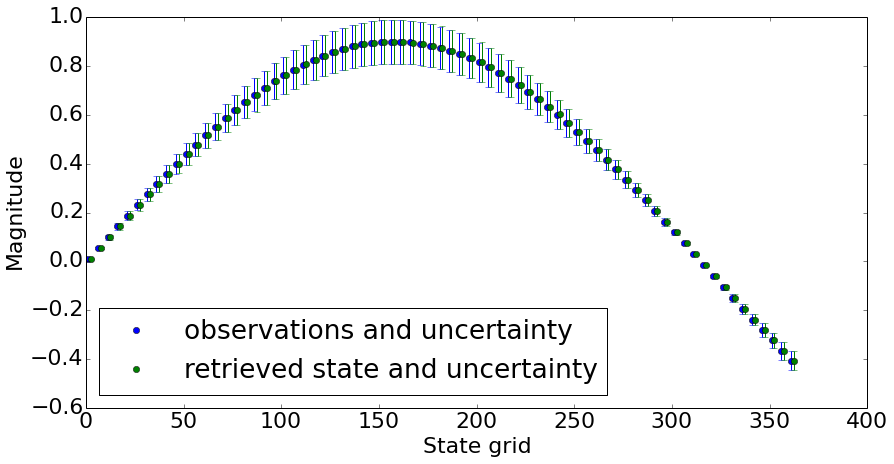

In [6]:
plt.rcParams.update({'font.size': 22})

#fetch the standard deviation from the returned covariance matrix
retunc = [math.sqrt(cov) for cov in retval['post_cov'].todense().tolist()[0]]

fig,ax = plt.subplots(figsize=(14,7))
ax.errorbar(state_grid, obs, obserr, fmt='ob')
ax.errorbar([x+1.5 for x in state_grid], retval['real_map']['magnitude'],
            retunc, fmt='og')
ax.legend(['observations and uncertainty', 'retrieved state and uncertainty'],
          loc = 'best', numpoints=1)
ax.set_xlabel('State grid')
ax.set_ylabel('Magnitude')
#pylab.savefig('figures/test4_1_VARIE')

Repeat the test for the same experimental setup but this time with an observation uncertainty of 0.1 for every observation and apply synthetic noise to the observations (from a Gaussian distribution, sigma = 0.1)

In [7]:
# Add obs errors
sigma = 0.1
noise = [random.gauss(0, sigma) for i in range(len(state_grid))]
obs_noisy = obs+noise
obserr = sigma*np.ones(len(state_grid))

# Create a new state vector...
new_state = eoldas_ng.State ( state_config, state_grid, 
                                  default_values, 
                   parameter_min, parameter_max, optimisation_options=optimisation_options )
# ...and a new observation operator.
new_obs = eoldas_ng.ObservationOperator(state_grid, obs_noisy, obserr, mask)
the_state.add_operator("observations", new_obs)

# Retrieve the state with the same starting point as before.
new_retval = the_state.optimize(x0 = x_dict, do_unc=True)
# Get the standard deviations from the retrieved covariance matrix.
new_retunc = [math.sqrt(cov) for cov in new_retval['post_cov'].todense().tolist()[0]]

Saving results to eoldas_retval_20160120_175820_SH97R


Plot the true and retrieved state and uncertainties. They should be the same

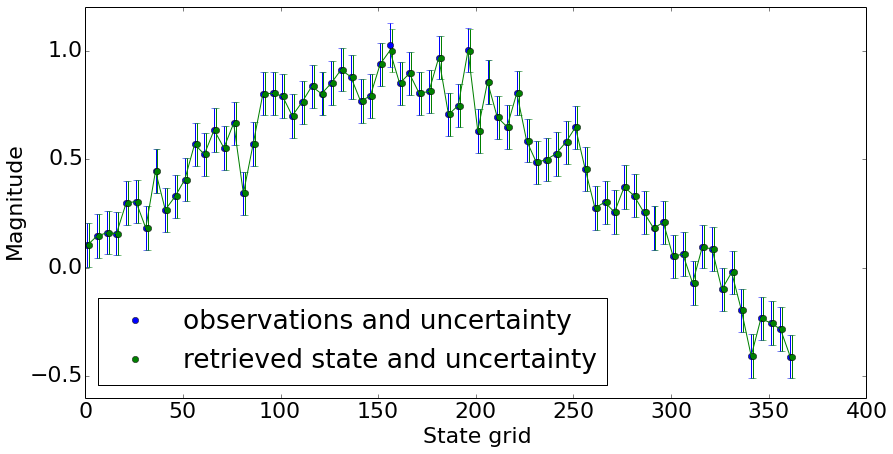

In [8]:
fig,ax = plt.subplots(figsize=(14,7))
ax.errorbar(state_grid, obs_noisy, obserr, fmt = 'o')
ax.errorbar([x+1 for x in state_grid], new_retval['real_map']['magnitude'],
            new_retunc, fmt='og')
ax.plot(state_grid, new_retval['real_map']['magnitude'])
#ax.plot(state_grid, obs, '--')

ax.legend(['observations and uncertainty', 'retrieved state and uncertainty'],
          loc = 'best', numpoints=1)
ax.set_xlabel('State grid')
ax.set_ylabel('Magnitude')
#pylab.savefig('figures/test4_1_VARIE2')